<a href="https://colab.research.google.com/github/souravkumar-singh/DS_Project/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
link = r'https://raw.githubusercontent.com/AshishJangra27/Machine-Learning-with-Python-GFG/main/Linear%20Regression/data_for_lr.csv'
df=pd.read_csv(link)


**Data** **Processing**

In [3]:
df=df.dropna()
print("Shape of data", df.shape)

Shape of data (699, 2)


**Splitting Data**

In [4]:
#training input and output data
x_train=np.array(df.x[0:500]).reshape(500,1)
y_train=np.array(df.y[0:500]).reshape(500,1)

#test input and output data
x_test=np.array(df.x[500:699]).reshape(199,1)
y_test=np.array(df.y[500:699]).reshape(199,1)

In [5]:
print("Shape of train ", x_train.shape, y_train.shape)
print("Shape of test ", x_test.shape, y_test.shape)

Shape of train  (500, 1) (500, 1)
Shape of test  (199, 1) (199, 1)


**<font color="green">Linear Regression</font>**

**Forward Propagation**

In [6]:
def forward_propagation(parameters, x_train):
  m=parameters["m"]
  c=parameters["c"]
  y_pred=np.multiply(m,x_train)+c

  return y_pred;

**Cost Function**

In [49]:
def cost_function(y_pred, y_train):
  cost=np.mean((y_pred-y_train)**2)
  return cost

**Backward Propagation**

In [36]:
def backward_propagation(y_pred, y_train, x_train):
  dm=np.mean(np.multiply(y_pred-y_train,x_train))
  dc=np.mean(y_pred-y_train)

  derivatives=dict()
  derivatives["dm"]=dm
  derivatives["dc"]=dc

  return derivatives

**Updating Parameters**

In [13]:
def update_parameter(parameters, derivatives, learning_rate):
  parameters["m"] = parameters["m"]- ( learning_rate * derivatives["dm"])
  parameters["c"] = parameters["c"]- ( learning_rate * derivatives["dc"])

  return parameters

**Model Training**

In [51]:
def train(x_train, y_train, learning_rate, iters):

  #random parameters
  parameters = dict()
  parameters["m"] = np.random.uniform(0,1)
  parameters["c"] = np.random.uniform(0,1)

  loss = list()
  for i in range(iters):
    #forward propagation
    y_pred = forward_propagation(parameters,x_train)

    #cost function
    cost = cost_function(y_pred, y_train)
    loss.append(cost)

    #backward propagation
    derivatives = backward_propagation(y_pred, y_train, x_train)

    #updated parameters
    parameters = update_parameter(parameters, derivatives, learning_rate)

  return parameters, loss



**Training**

In [52]:
parameters, loss =train(x_train,y_train,0.0001,20)

In [53]:
print(parameters)

{'m': 0.9903970898129812, 'c': 0.44773515708702827}


**Let's Predict**

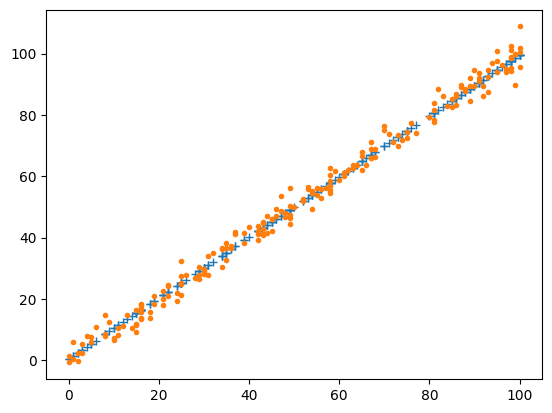

In [54]:
from matplotlib import pyplot as plt

test_prediction = x_test * parameters["m"]+parameters["c"]
plt.plot(x_test,test_prediction,"+")
plt.plot(x_test,y_test,".")
plt.show()

<font color ="sky blue" size=5> Linear Regression Using ScikitLearn</font>

In [41]:
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [42]:
print("m value ", lr_model.coef_ ,end=" ")
print("c value ",lr_model.intercept_)

m value  [[1.0009993]] c value  [-0.23603461]


In [43]:
test_predictions = lr_model.predict(x_test)

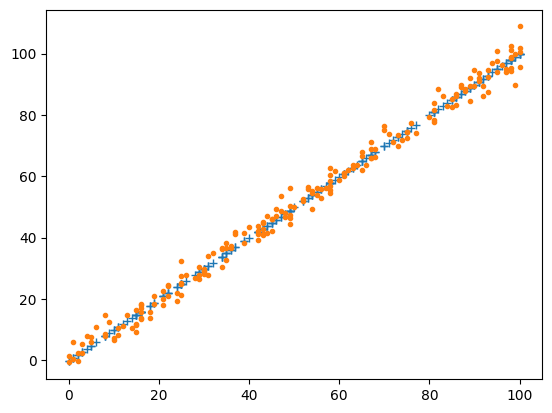

In [46]:
plt.plot(x_test,test_predictions,"+")
plt.plot(x_test,y_test,".")
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error

cost=mean_squared_error(y_test,test_predictions)
print(cost)

8.030031591835378


In [55]:
cost=cost_function(y_test,test_prediction)
print(cost)

8.005137054936666
